# In this notebook, I'll try to apply TRANSFORMER model for a CHATBOT from scratch

## Overview
***
*A chatbot or chatterbot is a software application used to conduct an on-line chat conversation via text or text-to-speech, in lieu of providing direct contact with a live human agent chatbot is a type of software that can help human by automating conversations and interact with them through messaging platforms. here are different approaches and tools that you can use when building chatbots. Depending on the use case you want to address, some technologies are more appropriate than others. Combining artificial intelligence forms such as natural language processing, machine learning, and semantic understanding may be the best option to achieve the desired results.*
***


## How to build a Chatbot for our task?
***
ChatBots are usually Task specific means if there a chatbot which serves only food delivery app have trained on a dataset which
completely different from the dataset on which chatbot which serves online healthcare app. Similary, for this kaggle problem
we have provided with movie dataset which may feel that its not specific to any task, but actually it is specific to how people
will interect generally as these movie dialogues are nothing but daily life conversation between people however, that chatbot
may reply things which sounds too much dramatic and filmy like some dialogue of Tom cruise, shah rukh khan etc.

We can approch this problem by applying Neural network models like encoder-decoder architecture with some attention mechanism.
***

In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 KB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 KB 13.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:0000:010:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spello

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:

import numpy as np
import codecs
import tensorflow as tf
import pandas as pd
import ast
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
import tensorflow_datasets as tfds
import joblib
import time
from tensorflow.keras.utils import Progbar
warnings.filterwarnings('ignore')
from pathlib import Path
import string
import joblib
import json
from collections import Counter
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dense, Flatten, Conv1D, MaxPooling1D, SimpleRNN, GRU, LSTM, Input, Embedding, TimeDistributed, Flatten, Dropout,Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from spello.model import SpellCorrectionModel

D0620 12:42:06.220891258      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0620 12:42:06.220924536      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0620 12:42:06.220927773      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0620 12:42:06.220930131      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0620 12:42:06.220932323      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0620 12:42:06.220935101      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0620 12:42:06.220937428      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0620 12:42:06.

## Loading cleaned data that I have preprared while EDA and preprocessing

In [5]:
data=pd.read_csv("/kaggle/input/final-data10400/Final_Data.csv")
data

,question,answer
0,i am not feeling well i feel really weak hopel...,im sorry to hear that but do not worry this is...
1,well where do i begin with those instructions ...,i want you to know that adhd depression is a t...
2,who are the people with expertise in the field...,the people who can give you a helping hand to ...
3,what if i dont seek help from you or those exp...,if you dont seek help from me or people with e...
4,what areas of life can adhd affect,difficulties in focusing and paying attention ...
...,...,...
10380,how can i engage in enjoyable activities to av...,engaging in enjoyable activities is essential ...
10381,how can i detach from screens while relaxing i...,disconnecting from screens is important to mai...
10382,how do i get enough sleep during the recovery ...,to ensure you get enough sleep here are some t...
10383,how can i eat a balanced diet while being trea...,eating a wellbalanced diet is important to nou...


In [63]:
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in data["answer"]])
max_decoder_seq_length

247

## Dividing into TWO, train/validation

In [6]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data, test_size=0.2, random_state=4)

In [7]:
vocab_ans = list(set(" ".join(train['answer'].values).split()))
vocab_ques = list(set(" ".join(train['question'].values).split()))
vocab_size_ans, vocab_size_ques = len(vocab_ans), len(vocab_ques)
print(f"vocab_size_ans, vocab_size_ques:{vocab_size_ans},{ vocab_size_ques}")

vocab_size_ans, vocab_size_ques:6807,3686


## Using tfds SubwordTextEncoder, it will create tokens
#### example Multiplication -> Multi, pli, cat, i, on 
#### Advantages: 
    1. Reduces vocab size => faster learning
    2. Reduces chances of missing word in test data

In [8]:
tokenizer_a = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    data['answer'], target_vocab_size=2**15) 

tokenizer_q = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    data['question'], target_vocab_size=2**15)

In [9]:
print(f"tokenizer_q:{tokenizer_q.vocab_size}")
print(f"tokenizer_a:{tokenizer_a.vocab_size}")

tokenizer_q:5214
tokenizer_a:9061


#### Examples of subword tokenization in action!

In [10]:
sample_string = 'Encoder decoder'

tokenized_string = tokenizer_a.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer_a.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

for token in tokenized_string:
    print(str(token) + "---->" + tokenizer_a.decode([token]))

print("="*80)
tokenized_string = tokenizer_q.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer_q.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

for token in tokenized_string:
    print(str(token) + "---->" + tokenizer_q.decode([token]))

Tokenized string is [8874, 8915, 8904, 8916, 8905, 8906, 8919, 8837, 8905, 8906, 8904, 8916, 8905, 8906, 8919]
The original string: Encoder decoder
8874---->E
8915---->n
8904---->c
8916---->o
8905---->d
8906---->e
8919---->r
8837----> 
8905---->d
8906---->e
8904---->c
8916---->o
8905---->d
8906---->e
8919---->r
Tokenized string is [5027, 5068, 5057, 5069, 5058, 5059, 5072, 4990, 5058, 5059, 5057, 5069, 5058, 5059, 5072]
The original string: Encoder decoder
5027---->E
5068---->n
5057---->c
5069---->o
5058---->d
5059---->e
5072---->r
4990----> 
5058---->d
5059---->e
5057---->c
5069---->o
5058---->d
5059---->e
5072---->r


###### 0-27512 for questions

###### 0-27357 for answers

* **Attaching token number '27513' representing \<start> and '27514' representing \<end> QUESTIONS**
* **Attaching token number '27358' representing \<start> and '27359' representing \<end> ANSWERS**

In [11]:
def encode(ques, ans):
    ques = [tokenizer_q.vocab_size] + tokenizer_q.encode(ques.numpy()) + [tokenizer_q.vocab_size+1]
    ans = [tokenizer_a.vocab_size] + tokenizer_a.encode(ans.numpy()) + [tokenizer_a.vocab_size+1]
    return ques, ans

def tf_encode(ques, ans):
    result_ques, result_ans = tf.py_function(encode, [ques, ans], [tf.int64, tf.int64])
    result_ques.set_shape([None])
    result_ans.set_shape([None])
    return result_ques, result_ans

In [12]:
print(train['question'].values[0],"\n",train['answer'].values[0])
question, answer = tf_encode(train['question'].values[0],train['answer'].values[0])
print(question)
print(answer)

can conversion disorder symptoms be temporary 
 yes conversion disorder symptoms can be temporary and may resolve spontaneously over time
tf.Tensor([5214    1  464   19   37   13 2543 5215], shape=(8,), dtype=int64)
tf.Tensor(
[9061   10  982   16   25    5   15  504    1   17 1247 2236  198  555
 9062], shape=(15,), dtype=int64)


### Creating train_dataset/test_dataset object from Dataframe + padding

###### prefetch: If I'm at epoch-20 then prefetch prepares the Batch for epoch-21, so when epoch-21 start, it will make available the batch in no time, basically enhancing speed

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices(dict(train))
train_dataset = train_dataset.map(lambda x:tf_encode(x['question'], x['answer']))
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(20000).padded_batch(64, padded_shapes=([None],[None])) 
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE) 

In [14]:
val_dataset = tf.data.Dataset.from_tensor_slices(dict(validation))
val_dataset = val_dataset.map(lambda x:tf_encode(x['question'], x['answer']))
val_dataset = val_dataset.padded_batch(64, padded_shapes=([None],[None]))

In [15]:
question, answer = next(iter(train_dataset))
question

<tf.Tensor: shape=(64, 20), dtype=int64, numpy=
array([[5214,    6,    1, ...,    0,    0,    0],
       [5214,    5,   75, ...,    0,    0,    0],
       [5214,    5,   16, ...,    0,    0,    0],
       ...,
       [5214,    6,   16, ...,    0,    0,    0],
       [5214,    8,   21, ...,    0,    0,    0],
       [5214,    5,    8, ...,    0,    0,    0]])>

### Positional encoding function where 'i' -> embedding dimn index, 'pos' -> word index in a sentence

$$\Large{PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})} $$

(1, 50, 512)


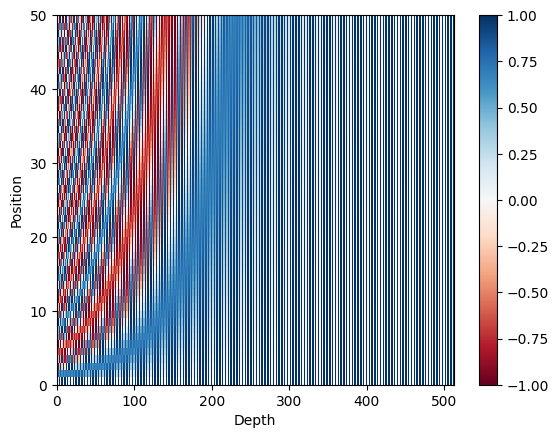

In [16]:
# Positional encoding

def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates



def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis,:]

    return tf.cast(pos_encoding, dtype=tf.float32)


pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## 1. Pad Masking
#### Making all the padded tokens, self attention/attention calculation of a word with those paddings will be ignored


* Here output dimn -> (batch_size, 1, 1, seq_len) 
          
*  for each 8 attention heads, for each query word it will be multiplied, thats why creating 1, 1 in the middle

##### (batch_size, 8, query_word_len, seq_len) * (batch_size, 1, 1, seq_len) 

In [17]:
# Masking

'''Mask all the pad tokens in the batch of sequence. 
It ensures that the model does not treat padding as the input. 
The mask indicates where pad value 0 is present: it outputs a 1 at those locations, and a 0 otherwise.
'''
def create_padding_mask(seq):
    """
    seq: padded sentence length (5)
    """
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    # Adding 2, 3 dimn using tf.newaxis, 2-> As this mask will be multiplied with each attention head and 3-> for each word in a sentance
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)
# create_padding_mask(np.array([[1,2,3,0,0,0],[1,2,3,0,0,1]]))

## 2. Looakahead mask

for the first word, its self attention calculation with be ignored with proceeding words i.e. second, third word and so on

In [18]:
# Looakahead mask

"""The look-ahead mask is used to mask the future tokens in a sequence. 
In other words, the mask indicates which entries should not be used.
"""
def create_look_ahead_mask(size):
    """
    The look-ahead mask is used to mask the future tokens in a sequence
    """
    #band_part with this setting creates lower triangular matrix that's why subtracting from 1
    # [[0., 1., 1.],
    #  [0., 0., 1.],
    #  [0., 0., 0.]] output with size:3
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

#example
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

## 3. SELF-ATTENTION calculation

![image](images/attenion_formula.png)

In [19]:
def scaled_dot_product_attention(q, k, v, mask=None):
    """
    Args:
    q: query shape == (..., seq_len_q, depth) # NOTE: depth=dk
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
    output, attention_weights
    """ 
    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
    # scale matmul_qk. underroot d_model i.e. underroot(100)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    # add the mask to the scaled tensor. 
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  # -1e9 ~ (-INFINITY) => where ever mask is set, make its logit value close to -INF
    # softmax is normalized on the last axis (seq_len_k) so that the scores add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)
    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

## 4. MultiHeadAttention Calculation
#### Its nothing but a RESHAPING !! :)
example : 
1. if we have (64, 10, 512)->(BATCH, #words, embeddding) as input, after passiing it though dense layer of size 512 we will get (64, 10, 512)
2. We have three such dense layers representing/for Q, K, V encodings.
3. (64, 10, 512) -> reshape -> (64, 8, 10 ,64) -> (BATCH, attention head, #words, encode)
    '64' is representing encoding of 512 -> 64 dimension
4. (64, 8, 10 ,64)->self-attention-code->(64, 8, 10 ,10) called attention weights, (64, 8, 10 ,64)
5. Concatenate such that 8*64 will be new dimension -> (64, 10, 512)
    
    **Beware embedding dimn must be divisible by no. of heads and always embedding_dimn/heads => encodin_dimn(here 64)**
    
    **NICE HACK** (-_-)

![image](images/multi_head.png)

In [20]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model  # typically 512

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention, 
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights
    

## 5. ENCODER layer

#### -> self Multihead attention -> Residual+Norm -> Feed forward neural network -> Residual+Norm

![image](images/encoder_layer.png)


In [21]:
def point_wise_feed_forward_network(d_model, dff): #dff = 512
    return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])


class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model) # with Attention

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model) #with Attention

        return out2

In [22]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

## 6. DECODER LAYER
#### -> self multihead attention -> residual+norm -> multihead attention(between E & D) -> residual+norm -> feed forward NN -> residual+norm

![image](images/decoder_layer.png)

In [23]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
         
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x) 
        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2

## 7. ENCODER 
#### Nothing but repetation of Encoder layer :-) + Input embedding vector + positional encoding

![image](images/encoder.png)

In [24]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                                self.d_model)


        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                           for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        seq_len = tf.shape(x)[1]   #x:(batch, seq_len)
        # adding embedding and position encoding.
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32)) 
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x  # (batch_size, input_seq_len, d_model)

## 8. DECODER
#### Nothing but Repetation of decoder layers + posisional encoder + embedding layer

![image](images/decoder.png)

In [25]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                 look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

## 9. TRANSFORMER

#### Nothing but encoder+decoder+dense layer
##### (64,10,512) -> dense_layer -> (64,10,vocab_size)

![image](images/transformer.png)


In [26]:

class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                               input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                               target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights

#### So to create a transformer architecture which is now everywhere in NLP models, we require only 9 STEPs :-O

In [27]:
# tokenizer_a = joblib.load("tokenizer_a")
# tokenizer_q = joblib.load("tokenizer_q")

In [28]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = tokenizer_q.vocab_size + 2
target_vocab_size = tokenizer_a.vocab_size + 2
dropout_rate = 0.1

## Custom learning rate, proposed in the paper
#### First learning rate will be high and then after some epochs it will be decreasing ONLY

![image](images/lr.png)


In [29]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        #arg1 = tf.math.rsqrt(step)
        #arg2 = step * (self.warmup_steps ** -1.5)
        arg1 = tf.math.rsqrt(tf.cast(step, tf.float32))
        arg2 = tf.cast(step, tf.float32) * (tf.cast(self.warmup_steps, tf.float32) ** -1.5)
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [30]:
transformer = Transformer(num_layers, d_model, num_heads, dff, input_vocab_size, 
                          target_vocab_size, pe_input=input_vocab_size, 
                          pe_target=target_vocab_size, rate=dropout_rate)

In [31]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

### See, increasing and then decreasing

Text(0.5, 0, 'Train Step')

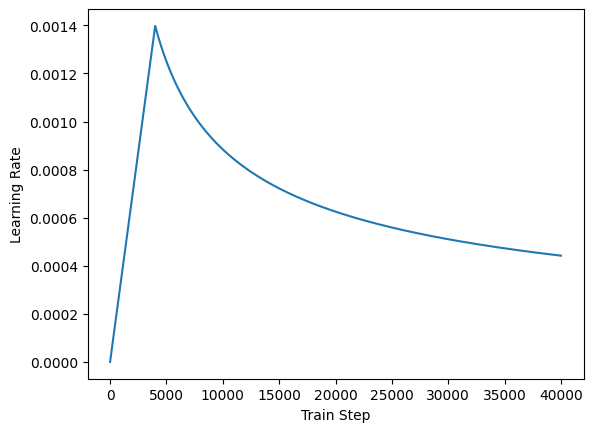

In [32]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

##### Custom losss function, same as sparse categorical cross entropy but considers only no padded values

In [33]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')
val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

### Creating pad mask(encoder), pad mask(decoder), lookahead mask(decoder)

In [34]:
def create_masks(inp, tar):
    # Encoder padding mask
    enc_padding_mask = create_padding_mask(inp)

    # Used in the 2nd attention block in the decoder.
    # This padding mask is used to mask the encoder outputs.
    dec_padding_mask = create_padding_mask(inp)

    # Used in the 1st attention block in the decoder.
    # It is used to pad and mask future tokens in the input received by 
    # the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

## Saving model checkpoint

In [35]:
checkpoint_path = "./checkpoints_test/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

## Using gradient tape for getting derivatives of loss functions w.r.t. weights then applyiing to optimizer => BACKPROPAGATION

In [36]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp) 
    with tf.GradientTape() as tape:
        predictions, _ = transformer(inp, tar_inp, 
                                     True, 
                                     enc_padding_mask, 
                                     combined_mask, 
                                     dec_padding_mask)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(tar_real, predictions)
    

In [37]:
val_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=val_step_signature)
def val_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp) 
    predictions, _  = transformer(inp, tar_inp, False, enc_padding_mask, combined_mask, dec_padding_mask)

    loss = loss_function(tar_real, predictions)

    val_loss(loss)
    val_accuracy(tar_real, predictions)

## Creating sample transformer to know the no. of trainable parameters

In [38]:
num_layers = 4
d_model = 1024
dff = 512
num_heads = 8
input_vocab_size = tokenizer_q.vocab_size + 2
target_vocab_size = tokenizer_a.vocab_size + 2
dropout_rate = 0.1

sample_transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

temp_input = tf.random.uniform((64, 27), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 27), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)
sample_transformer.summary()

Model: "transformer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Encoder)         multiple                  26351616  
                                                                 
 decoder_1 (Decoder)         multiple                  47092736  
                                                                 
 dense_135 (Dense)           multiple                  9289575   
                                                                 
Total params: 82,733,927
Trainable params: 82,733,927
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_layers = 4
d_model = 1024
dff = 512
num_heads = 8
input_vocab_size = tokenizer_q.vocab_size + 2
target_vocab_size = tokenizer_a.vocab_size + 2
dropout_rate = 0.1


transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [40]:
# EPOCHS = 100
# batch_size = 1024
# metrics_names = ['loss', 'acc'] 
# train_loss.reset_states()
# train_accuracy.reset_states()
# for epoch in range(EPOCHS):
#     print("\nepoch {}/{}".format(epoch+1,EPOCHS))
#     pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
#     # inp -> question, tar -> answer
#     for (batch, (inp, tar)) in enumerate(train_dataset):
#         train_step(inp, tar)
        
#         values=[('loss',train_loss.result()), ('acc',train_accuracy.result())]
#         pb_i.add(batch_size, values=values) 

#     for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
#         val_step(val_inp, val_tar)

#         values.append(('val_loss',val_loss.result()))
#         values.append(('val_acc',val_accuracy.result()))
#     pb_i.add(batch_size, values=values) 

                      
#     if (epoch + 1) % 5 == 0:
#         ckpt_save_path = ckpt_manager.save()
#         print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

In [41]:
EPOCHS = 50
batch_size = 1024
metrics_names = ['loss', 'acc'] 
train_loss.reset_states()
train_accuracy.reset_states()
best_val_loss = float('inf')
patience = 7 # Number of epochs to wait for improvement
no_improvement_count = 0
# Create lists to store accuracy values
train_acc_values = []
val_acc_values = []
train_loss_values = []
val_loss_values = []
for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1, EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        values=[('loss', train_loss.result()), ('acc', train_accuracy.result())]
        pb_i.add(batch_size, values=values) 

    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss', val_loss.result()))
        values.append(('val_acc', val_accuracy.result()))
    pb_i.add(batch_size, values=values) 
        # Store accuracy values
    train_acc_values.append(train_accuracy.result())
    val_acc_values.append(val_accuracy.result())
    train_loss_values.append(train_accuracy.result())
    val_loss_values.append(val_accuracy.result())

    if val_loss.result() < best_val_loss:
        best_val_loss = val_loss.result()
        no_improvement_count = 0
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print('Early stopping. No improvement in validation loss for {} epochs.'.format(patience))
            break


epoch 1/50
134144/8308 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 381s 3ms/step - loss: 7.7206 - acc: 0.0158 - val_loss: 6.5542 - val_acc: 0.0267
Saving checkpoint for epoch 1 at ./checkpoints_test/train/ckpt-1

epoch 2/50
134144/8308 [=============================================================================================================================================================================================================================================================================================================================

KeyboardInterrupt: 

In [42]:
transformer.save_weights('transformer_model/weights')

In [44]:

import tensorflow as tf

model = TFBertModel.from_pretrained('/kaggle/working/transformer_model')

NameError: name 'TFBertModel' is not defined

In [43]:
EPOCHS = 50
batch_size = 2048
metrics_names = ['loss', 'acc'] 
train_loss.reset_states()
train_accuracy.reset_states()
best_val_loss = float('inf')
patience = 7  # Number of epochs to wait for improvement
no_improvement_count = 0
# Create lists to store accuracy values
train_acc_values = []
val_acc_values = []
train_loss_values = []
val_loss_values = []
for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1, EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        values=[('loss', train_loss.result()), ('acc', train_accuracy.result())]
        pb_i.add(batch_size, values=values) 

    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss', val_loss.result()))
        values.append(('val_acc', val_accuracy.result()))
    pb_i.add(batch_size, values=values) 
        # Store accuracy values
    train_acc_values.append(train_accuracy.result())
    val_acc_values.append(val_accuracy.result())
    train_loss_values.append(train_accuracy.result())
    val_loss_values.append(val_accuracy.result())

    if val_loss.result() < best_val_loss:
        best_val_loss = val_loss.result()
        no_improvement_count = 0
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print('Early stopping. No improvement in validation loss for {} epochs.'.format(patience))
            break


epoch 1/50



KeyboardInterrupt



In [ ]:
transformer.save_weights('/kaggle/working/tansformer1.h5')
transformer.save_weights('transformer_model/weights')

In [ ]:
EPOCHS = 50
batch_size = 1024
metrics_names = ['loss', 'acc'] 
train_loss.reset_states()
train_accuracy.reset_states()
best_val_loss = float('inf')
patience = 7  # Number of epochs to wait for improvement
no_improvement_count = 0
# Create lists to store accuracy values
train_acc_values = []
val_acc_values = []
train_loss_values = []
val_loss_values = []
for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1, EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        values=[('loss', train_loss.result()), ('acc', train_accuracy.result())]
        pb_i.add(batch_size, values=values) 

    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss', val_loss.result()))
        values.append(('val_acc', val_accuracy.result()))
    pb_i.add(batch_size, values=values) 
        # Store accuracy values
    train_acc_values.append(train_accuracy.result())
    val_acc_values.append(val_accuracy.result())
    train_loss_values.append(train_accuracy.result())
    val_loss_values.append(val_accuracy.result())

    if val_loss.result() < best_val_loss:
        best_val_loss = val_loss.result()
        no_improvement_count = 0
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print('Early stopping. No improvement in validation loss for {} epochs.'.format(patience))
            break

In [ ]:
transformer.save_weights('/kaggle/working/tansformer3.h5')
transformer.save_weights('transformer_model/weights')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the Transformer model architecture
class TransformerModel(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, dropout_rate=0.1):
        super(TransformerModel, self).__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, dropout_rate)
        self.final_layer = layers.Dense(target_vocab_size)

    def call(self, inputs, training=False):
        enc_output = self.encoder(inputs, training=training)
        output = self.final_layer(enc_output)
        return output

class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, dropout_rate=0.1):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = layers.Embedding(input_vocab_size, d_model)
        self.positional_encoding = positional_encoding(input_vocab_size, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)]
        self.dropout = layers.Dropout(dropout_rate)

    def call(self, x, training=False):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.positional_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training=training)

        return x

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super(EncoderLayer, self).__init__()

        self.multi_head_attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.layer_norm1 = layers.LayerNormalization(epsilon=1e-6)

        self.ffn = point_wise_feed_forward_network(d_model, dff)
        self.dropout2 = layers.Dropout(dropout_rate)
        self.layer_norm2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, x, training=False):
        attn_output = self.multi_head_attention(x, x, return_attention_scores=False)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layer_norm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layer_norm2(out1 + ffn_output)

        return out2

def positional_encoding(position, d_model):
    angle_rads = get_angles(tf.range(position, dtype=tf.float32)[:, tf.newaxis],
                            tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
                            d_model)

    # Apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = tf.sin(angle_rads[:, 0::2])

    # Apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = tf.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

def get_angles(position, i, d_model):
    angle_rates = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angle_rates

def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        layers.Dense(dff, activation='relu'),
        layers.Dense(d_model)
    ])

# Define hyperparameters and create the model
EPOCHS = 50
batch_size = 2048
num_layers = 4
d_model = 128
num_heads = 8
dff = 512
dropout_rate = 0.1

input_vocab_size = len(input_vocab)  # Replace with your input vocabulary size
target_vocab_size = len(target_vocab)  # Replace with your target vocabulary size

model = TransformerModel(num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, dropout_rate)

# Define loss function and optimizer
loss_object = SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

# Training step
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_object(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(targets, predictions)

# Validation step
@tf.function
def val_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_object(targets, predictions)

    val_loss(loss)
    val_accuracy(targets, predictions)

# Training loop
for epoch in range(EPOCHS):
    print("\nEpoch {}/{}".format(epoch+1, EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
    # Training loop
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        values=[('loss', train_loss.result()), ('accuracy', train_accuracy.result())]
        pb_i.add(batch_size, values=values) 

    # Validation loop
    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss', val_loss.result()))
        values.append(('val_accuracy', val_accuracy.result()))
    pb_i.add(batch_size, values=values) 

    # Store accuracy values
    train_acc_values.append(train_accuracy.result())
    val_acc_values.append(val_accuracy.result())

    if val_loss.result() < best_val_loss:
        best_val_loss = val_loss.result()
        no_improvement_count = 0
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print('Early stopping. No improvement in validation loss for {} epochs.'.format(patience))
            break 

# Train the model
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=val_dataset)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

In [ ]:
# EPOCHS = 50
# batch_size = 1024
# metrics_names = ['loss', 'acc'] 
# train_loss.reset_states()
# train_accuracy.reset_states()
# best_val_loss = float('inf')
# patience = 10  # Number of epochs to wait for improvement
# no_improvement_count = 0
# # Create lists to store accuracy values
# train_acc_values = []
# val_acc_values = []

# for epoch in range(EPOCHS):
#     print("\nepoch {}/{}".format(epoch+1, EPOCHS))
#     pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
#     # inp -> question, tar -> answer
#     for (batch, (inp, tar)) in enumerate(train_dataset):
#         train_step(inp, tar)

#         values=[('loss', train_loss.result()), ('acc', train_accuracy.result())]
#         pb_i.add(batch_size, values=values) 

#     for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
#         val_step(val_inp, val_tar)

#         values.append(('val_loss', val_loss.result()))
#         values.append(('val_acc', val_accuracy.result()))
#     pb_i.add(batch_size, values=values) 
#         # Store accuracy values
#     train_acc_values.append(train_accuracy.result())
#     val_acc_values.append(val_accuracy.result())

#     if val_loss.result() < best_val_loss:
#         best_val_loss = val_loss.result()
#         no_improvement_count = 0
#         ckpt_save_path = ckpt_manager.save()
#         print('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
#     else:
#         no_improvement_count += 1
#         if no_improvement_count >= patience:
#             print('Early stopping. No improvement in validation loss for {} epochs.'.format(patience))
#             break

In [ ]:
import matplotlib.pyplot as plt

EPOCHS = 100
batch_size = 1024
metrics_names = ['loss', 'acc'] 
train_loss.reset_states()
train_accuracy.reset_states()

# Create lists to store accuracy values
train_acc_values = []
val_acc_values = []

for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1, EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)

    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        values = [('loss', train_loss.result()), ('acc', train_accuracy.result())]
        pb_i.add(batch_size, values=values)

    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss', val_loss.result()))
        values.append(('val_acc', val_accuracy.result()))
    pb_i.add(batch_size, values=values)

    # Store accuracy values
    train_acc_values.append(train_accuracy.result())
    val_acc_values.append(val_accuracy.result())

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch + 1, ckpt_save_path))

# Plot accuracy
epochs = range(1, EPOCHS + 1)
plt.plot(epochs, train_acc_values, label='Training Accuracy')
plt.plot(epochs, val_acc_values, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

EPOCHS = 100
batch_size = 2048
metrics_names = ['loss', 'acc'] 
train_loss.reset_states()
train_accuracy.reset_states()

# Create lists to store accuracy values
train_acc_values = []
val_acc_values = []

for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1, EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)

    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        values = [('loss', train_loss.result()), ('acc', train_accuracy.result())]
        pb_i.add(batch_size, values=values)

    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss', val_loss.result()))
        values.append(('val_acc', val_accuracy.result()))
    pb_i.add(batch_size, values=values)

    # Store accuracy values
    train_acc_values.append(train_accuracy.result())
    val_acc_values.append(val_accuracy.result())

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch + 1, ckpt_save_path))

# Plot accuracy
epochs = range(1, EPOCHS + 1)
plt.plot(epochs, train_acc_values, label='Training Accuracy')
plt.plot(epochs, val_acc_values, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

EPOCHS = 1
batch_size = 1024
metrics_names = ['loss', 'acc'] 
train_loss.reset_states()
train_accuracy.reset_states()

# Create lists to store accuracy values
train_acc_values = []
val_acc_values = []

for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1, EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)

    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        values = [('loss', train_loss.result()), ('acc', train_accuracy.result())]
        pb_i.add(batch_size, values=values)

    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss', val_loss.result()))
        values.append(('val_acc', val_accuracy.result()))
    pb_i.add(batch_size, values=values)

    # Store accuracy values
    train_acc_values.append(train_accuracy.result())
    val_acc_values.append(val_accuracy.result())

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print('Saving checkpoint for epoch {} at {}'.format(epoch + 1, ckpt_save_path))

# Plot accuracy
epochs = range(1, EPOCHS + 1)
plt.plot(epochs, train_acc_values, label='Training Accuracy')
plt.plot(epochs, val_acc_values, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
EPOCHS = 100
batch_size = 1024
metrics_names = ['loss', 'acc'] 
train_loss.reset_states()
train_accuracy.reset_states()
for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1,EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)
        
        values=[('loss',train_loss.result()), ('acc',train_accuracy.result())]
        pb_i.add(batch_size, values=values) 

    for (val_batch, (val_inp, val_tar)) in enumerate(val_dataset):
        val_step(val_inp, val_tar)

        values.append(('val_loss',val_loss.result()))
        values.append(('val_acc',val_accuracy.result()))
    pb_i.add(batch_size, values=values) 

                      
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

In [ ]:
EPOCHS = 1000
batch_size = 1024
metrics_names = ['loss', 'acc'] 
# train_loss.reset_states()
# train_accuracy.reset_states()
for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1,EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)
        
        values=[('loss',train_loss.result()), ('acc',train_accuracy.result())]
        
        pb_i.add(batch_size, values=values) 
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

In [ ]:
EPOCHS = 3000
batch_size = 1024
metrics_names = ['loss', 'acc'] 
# train_loss.reset_states()
# train_accuracy.reset_states()
for epoch in range(EPOCHS):
    print("\nepoch {}/{}".format(epoch+1,EPOCHS))
    pb_i = Progbar(train.shape[0], stateful_metrics=metrics_names)
 
    # inp -> question, tar -> answer
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)
        
        values=[('loss',train_loss.result()), ('acc',train_accuracy.result())]
        
        pb_i.add(batch_size, values=values) 
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

# With those hyperparameters it seems model is not learning at all, as there is no progress in 25 EPOCHS

In [50]:
ml = max([len(train["answer"])])
ml

8308

NameError: name 'target_docs' is not defined

In [64]:
MAX_LENGTH = max_decoder_seq_length

def evaluate(inp_sentence):
    start_token = [tokenizer_q.vocab_size]
    end_token = [tokenizer_q.vocab_size + 1]

    # inp sentence is portuguese, hence adding the start and end token
    inp_sentence = start_token + tokenizer_q.encode(inp_sentence) + end_token
    encoder_input = tf.expand_dims(inp_sentence, 0)

    # as the target is english, the first word to the transformer should be the
    # english start token.
    decoder_input = [tokenizer_a.vocab_size]
    output = tf.expand_dims(decoder_input, 0)

    for i in range(MAX_LENGTH):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
            encoder_input, output)

        # predictions.shape == (batch_size, seq_len, vocab_size)
        predictions, attention_weights = transformer(encoder_input, 
                                                     output,
                                                     False,
                                                     enc_padding_mask,
                                                     combined_mask,
                                                     dec_padding_mask)

        # select the last word from the seq_len dimension
#         print(predictions.shape,"aa",predictions[: ,-1:, :].shape)
        predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
#         print(predicted_id, output)
    # return the result if the predicted_id is equal to the end token
        if predicted_id == tokenizer_a.vocab_size+1: 
            return tf.squeeze(output, axis=0), attention_weights

    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [67]:
inp_sentence = "what should i do if i have concerns about the diagnosis provided by a healthcare professional"
a, b = evaluate(inp_sentence)
print(a)

tf.Tensor(
[9061    2  261    6 2860 1880 2472    4 4114    3 2663  942  950 1882
    2  950  326   44 1536  561    3 2663  124  612    6  911   21   31
    5  950    6 1351  950  495    8   32  239  706    8   32  543  695], shape=(42,), dtype=int32)


# RESULTS are ABSURD

In [68]:
x = []
for i in a[1:]:
    #print(tokenizer_a.decode([i]))
    x.append(tokenizer_a.decode([i]))
#print(x)
y = "".join(x)
print(y)

to find a registered psychologist visit the college of physicians must see power to see yourself an extended period of physicians also includes a belief that you can see a local see improvement in your learning disabilities in your study activities


 ## Lets try with different hyperparameters

In [ ]:
num_layers = 4
d_model = 1024
dff = 512
num_heads = 8

input_vocab_size = tokenizer_q.vocab_size + 2
target_vocab_size = tokenizer_a.vocab_size + 2
dropout_rate = 0.1
temp_input = tf.random.uniform((64, 27), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 27), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)
sample_transformer.summary()

In [ ]:
num_layers = 2
d_model = 1024
dff = 512
num_heads = 8
input_vocab_size = tokenizer_q.vocab_size + 2
target_vocab_size = tokenizer_a.vocab_size + 2
dropout_rate = 0.1

sample_transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

temp_input = tf.random.uniform((64, 27), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 27), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)
sample_transformer.summary()

### Now the trainable parameters has increased from 12M to 24M, Lets test this!!

## Learning is slow, but not stagnant (-__-)

# EPOCH:350, I think its enough, let's check what type of REPLIES that CHATBOT is generating

In [48]:
joblib.dump(tokenizer_q, "tokenizer_q.pkl")
joblib.dump(tokenizer_a, "tokenizer_a.pkl")
transformer.save_weights('transformer_model/weights')

In [42]:
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    
    fontdict = {'fontsize': 14}
    sentence = sentence.split(" ")
    predicted_sentence = predicted_sentence.split(" ")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)



def plot_attention_weights(attention,tokenizer_q, tokenizer_a, sentence, result, layer):
    
    fig = plt.figure(figsize=(16, 8))

    sentence = tokenizer_q.encode(sentence)

    attention = tf.squeeze(attention[layer], axis=0)
    #(1, 8, 5, 4) --> (8, 5, 4)
    for head in range(attention.shape[0]):
        ax = fig.add_subplot(2, 4, head+1)

        # plot the attention weights [:-1, :]
        ax.matshow(attention[head][:-1, :], cmap='viridis')
        fontdict = {'fontsize': 10}
        
        ax.set_xticks(range(len(sentence)+2))
        ax.set_yticks(range(len(result)-1))

        ax.set_ylim(len(result)-1.5, -0.5)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
        x = ['<start>']+[tokenizer_q.decode([i]) for i in sentence]+['<end>']
        y = [tokenizer_a.decode([i]) for i in result if i < tokenizer_a.vocab_size]
        ax.set_xticklabels([''] + x, fontdict=fontdict, rotation=90)
        ax.set_yticklabels([''] + y, fontdict=fontdict)


        ax.set_xlabel('Head {}'.format(head+1))
  
    plt.tight_layout()
    plt.show()
    
    
MAX_LENGTH = 70

def evaluate(inp_sentence, model,  tokenizer_q, tokenizer_a):
    start_token = [tokenizer_q.vocab_size]
    end_token = [tokenizer_q.vocab_size + 1]

    # All questions has the start and end token
    inp_sentence = start_token + tokenizer_q.encode(inp_sentence) + end_token
    encoder_input = tf.expand_dims(inp_sentence, 0)

    # 'answers' start token : 27358
    decoder_input = [tokenizer_a.vocab_size]
    decoder_input = tf.expand_dims(decoder_input, 0)

    for i in range(MAX_LENGTH):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, decoder_input)

        # predictions.shape == (batch_size, seq_len, vocab_size)
        predictions, attention_weights = model(encoder_input, 
                                                     decoder_input,
                                                     False,
                                                     enc_padding_mask,
                                                     combined_mask,
                                                     dec_padding_mask)

        # select the last word from the seq_len dimension
        predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # return the result if the predicted_id is equal to the end token
        if predicted_id == tokenizer_a.vocab_size+1:
#             print(f"=============\nGot end token\n=============")
            return tf.squeeze(decoder_input, axis=0), attention_weights

        # concatentate the predicted_id to the output which is given to the decoder
        # as its input.
        decoder_input = tf.concat([decoder_input, predicted_id], axis=-1)

    return tf.squeeze(decoder_input, axis=0), attention_weights

In [43]:
def reply(sentence, transformer,  tokenizer_q, tokenizer_a, plot=''):
    result, attention_weights = evaluate(sentence, transformer,  tokenizer_q, tokenizer_a)
#     print("Attention_Blocks:", list(attention_weights.keys()))
    predicted_sentence = tokenizer_a.decode([i for i in result 
                                            if i < tokenizer_a.vocab_size])  

#     print('Input: {}'.format(sentence))
#     print('Predicted translation: {}'.format(predicted_sentence))
    if plot:
        plot_attention_weights(attention_weights,tokenizer_q, tokenizer_a, sentence, result, plot)
    return sentence, predicted_sentence

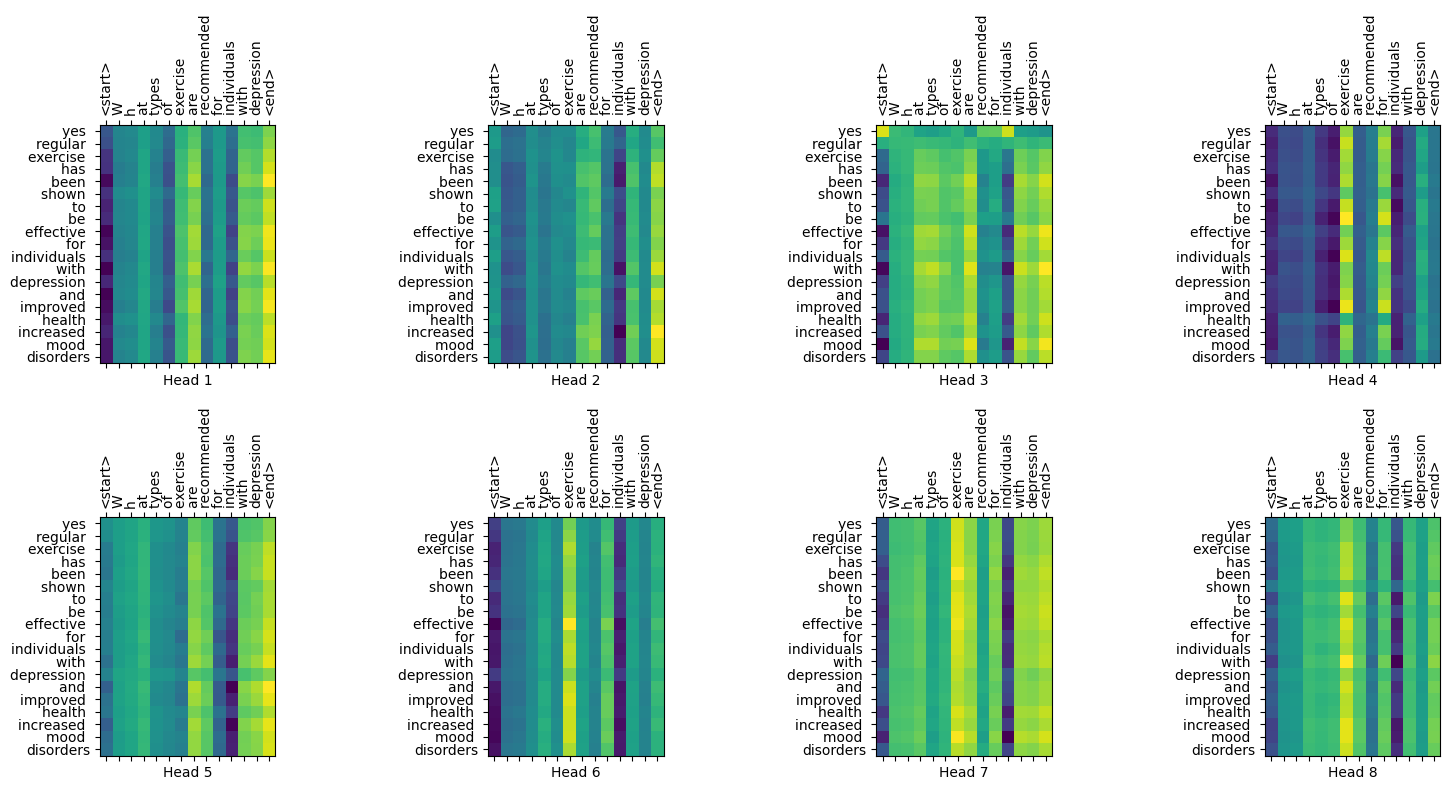

yes regular exercise has been shown to be effective for individuals with depression and improved health increased mood disorders


In [44]:
inp_sentence = "What types of exercise are recommended for individuals with depression"
_,respone=reply(inp_sentence, transformer,  tokenizer_q, tokenizer_a, "decoder_layer2_block2")
print(respone)

## OUTPUTS are not absurd at all, It has LEARNED

In [81]:
transformer.save_weights('transformer_model/weights_123')

In [47]:
inp_sentence = "what is schizophrenia"
reply(inp_sentence, transformer,  tokenizer_q, tokenizer_a)

('what is schizophrenia',
 'schizophrenia is a chronic severe or progressive condition that affects how thinks behaves symptoms early intervention and social withdrawal')

In [ ]:
train.iloc[400:406]

In [ ]:
validation.iloc[400:406]

In [ ]:
!pip install nltk

In [ ]:

import nltk.translate.bleu_score as bleu
from tqdm import tqdm
test_q = train["question"].values[:10]
test_a = train["answer"].values[:10]
bss = []
for i in range(10):
    input_test_sentence = test_q[i]
    input_sentence, pred_string = reply(input_test_sentence, transformer,  tokenizer_q, tokenizer_a, plot='')
    print("Actual:", test_a[i])
    reference = [test_a[i].split()] # the original
    translation = pred_string.split() # trasilated using model
    bs = bleu.sentence_bleu(reference, translation)
    bss.append(bs)
    print(bs)

In [ ]:
import nltk.translate.bleu_score as bleu
from tqdm import tqdm
test_q = validation["question"].values[100:110]
test_a = validation["answer"].values[100:110]
bss = []
for i in range(10):
    input_test_sentence = test_q[i]
    input_sentence, pred_string = reply(input_test_sentence, load_transformer,  tokenizer_q, tokenizer_a, plot='')
    print("Actual:", test_a[i])
    reference = [test_a[i].split()] # the original
    translation = pred_string.split() # trasilated using model

In [49]:
import joblib

# tokenizer_q
tokenizer_q1 = joblib.load("/kaggle/input/transformer-model/tokenizer_q")

# tokenizer_a
tokenizer_a1 = joblib.load("/kaggle/input/transformer-model/tokenizer_a")


In [50]:
num_layers = 4
d_model = 1024
dff = 512
num_heads = 8
input_vocab_size = tokenizer_q.vocab_size + 2
target_vocab_size = tokenizer_a.vocab_size + 2
dropout_rate = 0.1

load_transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)
load_transformer.load_weights('/kaggle/input/transformer-model/weights')


In [52]:
inp_sentence = "what is schizophrenia"
reply(inp_sentence, load_transformer,  tokenizer_q1, tokenizer_a1)

Input: what is schizophrenia
Predicted translation: schizophrenia is a chronic condition that affects a persons control over their lifetime as the brain hallucinations delusions and disorganized thinking and thinking and impaired judgment and hallucinations or delusions that cannot be explained by normal the stressful situations to the persons control


('what is schizophrenia',
 'schizophrenia is a chronic condition that affects a persons control over their lifetime as the brain hallucinations delusions and disorganized thinking and thinking and impaired judgment and hallucinations or delusions that cannot be explained by normal the stressful situations to the persons control')

* Results are great, better than encoder-decoder with bahadenau attention mechanism
* Still we can see the results are not perfect, because the architecture has less parameters plus the dataset is not very big and transformers works close to humans with large data and large trainable parameters

# On random inputs!
### Results are genuine

In [ ]:
inp_sentence = "hi"
reply(inp_sentence, load_transformer,  tokenizer_q, tokenizer_a)


In [ ]:
# inp_sentence = "Where have you been"
# reply(inp_sentence, load_transformer,  tokenizer_q, tokenizer_a)


#### Making sense haha : ) "who are you"

In [ ]:
# inp_sentence = "who are you"
# reply(inp_sentence, load_transformer,  tokenizer_q, tokenizer_a)


####  Again making sense "where do you live"

In [ ]:
# inp_sentence = "where do you live"
# reply(inp_sentence, load_transformer,  tokenizer_q, tokenizer_a)

In [ ]:
# inp_sentence = "what is your name"
# reply(inp_sentence, load_transformer,  tokenizer_q, tokenizer_a)

In [ ]:
# inp_sentence = "i am not feeling well i feel really weak hopeless mood disturbances and stress due to my adhdhow do you explain this feeling"
# reply(inp_sentence, load_transformer,  tokenizer_q, tokenizer_a)

# Even with this small architecture its working fine, what else it could do If I train it with trainable parameters with more data

# Retrival Model 

In [ ]:
with open("/kaggle/input/retrival-data/new_dataset.json") as f:
    intents = json.load(f)

In [ ]:
from nltk.stem.porter import PorterStemmer
import nltk
import numpy as np
nltk.download('punkt')
stemmer = PorterStemmer()


def tokenize(sentence):
    return nltk.word_tokenize(sentence)


def stem(ward):
    return stemmer.stem(ward.lower())


def bag_of_ward(tokenized_sentence, all_ward):

    tokenized_sentence = [stem(w) for w in tokenized_sentence]

    bag = np.zeros(len(all_ward), dtype=np.float32)

    for idx, w in enumerate(all_ward):
        if w in tokenized_sentence:
            bag[idx] = 1.0

    return bag

In [ ]:
all_word = []
tags = []
xy = []

for intent in intents['intents']:
    tag = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = tokenize(pattern)

        all_word.extend(w)
        xy.append((w, tag))

ignor_word = ['?', '.', '!', ',']
all_word = [stem(w) for w in all_word if w not in ignor_word]



all_word = sorted(set(all_word))
tags = sorted(set(tags))

vocab_size = len(all_word)
print(vocab_size)

Xtrain = []
ytrain = []

for (pattern_sentence, tag) in xy:
    bag = bag_of_ward(pattern_sentence, all_word)
    Xtrain.append(bag)

    label = tags.index(tag)
    ytrain.append(label)

Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)
ytrain =pd.get_dummies(ytrain)
ytrain=np.array(ytrain)
print(ytrain.shape)

In [ ]:
max_length = Xtrain.shape[1]
max_classes = ytrain.shape[1]
max_length

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( Xtrain, ytrain, test_size=0.20, random_state=42)


In [ ]:
early_stopping = EarlyStopping(monitor='loss',patience=30) #patience : number of epochs with no improvement after which training will be stopped

checkpoint = ModelCheckpoint("model-v1.h5",
                             monitor="loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor = 'accuracy', factor = 0.2, patience = 10, verbose = 1, min_delta = 0.001)

callbacks = [early_stopping,checkpoint,reduce_lr]

In [ ]:
def define_model1(max_length,max_classes):
    model1 = Sequential()
    model1.add(Dense(32, input_shape=(max_length,),activation='relu'))
    model1.add(Dense(16,activation='relu'))
    model1.add(Dense(8,activation='relu'))
    model1.add(Dense(max_classes, activation='sigmoid'))
    model1.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
    
    #summarize defined model
    model1.summary()
    plot_model(model1, to_file='model_1.png', show_shapes=True)
    return model1


In [ ]:
model1 = define_model1(max_length,max_classes)


In [ ]:
history1 = model1.fit(Xtrain, ytrain, epochs=500, verbose = 1,callbacks=early_stopping)


In [ ]:
acc = history1.history['accuracy']
loss=history1.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
depreesion = ["1. Practice Self-Care: Taking care of your physical and emotional needs is important for managing depression. This can include getting enough sleep, eating a balanced diet, exercising regularly, and engaging in activities that bring you joy.","2. Seek professional help: Depression is a serious condition that may require medical attention. It is important to speak with a mental health professional who can provide guidance and support in managing your symptoms.","3. Follow your treatment plan: If you are prescribed a medication, be sure to take it as directed by your doctor. Attend all therapy sessions and actively participate in your treatment plan.","4. Challenging negative thoughts: Depression can often involve negative thoughts and self-criticism. Practice challenging these thoughts by looking for evidence that supports or contradicts them, and rephrasing them in a more positive and realistic light.","5. Stay connected: Social support is important for managing depression. Make an effort to stay in touch with friends and loved ones, even if it feels challenging.","6. Practice relaxation techniques: Relaxation techniques such as deep breathing, meditation or yoga can help manage stress and reduce symptoms of depression.","7. Remember that recovery from depression is a process and may take time. Be patient with yourself and don't hesitate to ask for help when you need it."]
Anxiety = ["1.Identify triggers: Work with your therapist to identify situations, people, or events that trigger your anxiety. This can help you prepare and develop coping strategies.","2.Gradual exposure: Gradual exposure to feared situations or triggers can be an effective way to manage anxiety. Work with a therapist to develop a gradual exposure plan that feels safe and manageable for you.","3.Cognitive behavioral therapy (CBT): is one of the most effective forms of psychotherapy for anxiety disorders. In general, short-term cognitive behavioral therapy focuses on teaching specific skills to improve symptoms and gradually returning to activities the person avoids because of anxiety.","4.Use positive self-talk: Replace negative self-talk with positive, supportive statements. This can help reduce anxiety and increase self-confidence.","5.Avoid procrastination: Procrastination can increase anxiety by creating a sense of urgency and stress. Try to complete tasks as they come up, and break larger tasks into smaller, more manageable steps.","6.Learn coping skills: Your therapist can teach you specific coping skills, such as cognitive-behavioral techniques or exposure therapy, to help manage your anxiety.","7.Seek professional help: Anxiety disorders can be debilitating and it's important to speak with a mental health professional who can provide guidance and support in managing your symptoms.","8.Practice relaxation techniques: Relaxation techniques like deep breathing, meditation, or yoga can help manage stress and reduce symptoms of anxiety.","9.Challenge negative thoughts: Anxiety can often involve negative and catastrophic thinking. Practice challenging these thoughts by looking for evidence that supports or contradicts them, and reframing them in a more positive and realistic light.","10.Maintain a healthy lifestyle: Taking care of your physical and emotional needs is important for managing anxiety. This can include getting enough sleep, eating a balanced diet, and exercising regularly.","Send a message if there are any inquiries regarding these instructions or if there is difficulty in applying them."]
Addictive = ["1.Create a support system: Building a support system of family, friends, or support groups can be helpful in managing addiction. Reach out to loved ones and consider joining a support group such as Alcoholics Anonymous or Narcotics Anonymous.","2.Create a recovery plan: Work with your therapist or support group to create a recovery plan that includes goals, strategies, and a support system.","3.Setting boundaries: Setting boundaries with people or situations that enable or lead to addiction can be helpful in managing addiction. Clearly articulate your boundaries and stick to them.","4.Be accountable: Accountability can be helpful in managing addiction. Consider sharing your recovery plan with a trusted friend or family member and asking them to check in with you regularly.","5.Celebrate small victories: Addiction recovery is a long and difficult process. Celebrate the small victories along the way, like completing a week of sobriety or reaching a milestone in your recovery plan.","6.Attending support group meetings: Support group meetings, such as Alcoholics Anonymous or Narcotics Anonymous, can provide a safe and supportive space to share experiences and learn from others who have gone through similar struggles.","7.Motivational Enhancement Therapy (MET): Motivational therapy is an approach that helps increase people's willingness to change. It can be useful for improving adherence and motivation to start and stay in treatment.","8.Seek professional help: Addiction is a complex condition that requires professional help. Consider seeing a mental health professional who specializes in addiction treatment.","9.Avoidance of triggers: Triggers such as stress, certain people or places, and emotional distress can lead to a relapse. Avoid triggers as much as possible and develop strategies to manage them as they arise.","10.Learning new coping strategies: Addiction often involves the use of substances as a coping mechanism for stress or difficult feelings. Learn new coping strategies such as mindfulness, exercise, or hobbies to manage stress and emotions in a healthy way.","11.Practice Self-Care: Taking care of your own physical and emotional needs is important for managing addiction. This can include getting enough sleep, eating a balanced diet, exercising regularly, and engaging in activities that bring you joy.","Send a message if there are any inquiries regarding these instructions or if there is difficulty in applying them."]
PTSD = ["1.Seek professional help: Postpartum depression or anxiety is a medical condition that requires professional treatment. A mental health professional or health care provider can provide guidance and support in managing your condition.","2.Take care of your physical health: Taking care of your physical health can help improve your mental health. This can include getting enough sleep, eating a healthy diet, and getting regular physical activity.","3.Ask for help: It is important to ask for help when you need it. Don't be afraid to reach out to friends, family, or other sources of support to help with tasks like cooking, cleaning, or babysitting.","4.Attending support group meetings: Attending support group meetings can provide new moms with a safe and supportive space to share experiences and learn from others who are going through similar challenges.","5.Make time for self-care: It's important to prioritize self-care, even if it feels challenging with a new baby. This can include taking a shower, reading a book, or engaging in other activities that bring you joy and relaxation.","6.Challenge negative thoughts: When you notice negative thoughts, practice challenging them by looking for evidence to support or contradict them, and rephrase them in a more positive and realistic light.","7.Gradually increase social support: Social support is important for managing postpartum depression or anxiety. Gradually increasing social activities, such as meeting friends or joining a moms' group, can help reduce feelings of isolation.","8.Take it one day at a time: Recovering from postpartum depression or anxiety is a process, and it's important to take it one day at a time. Focus on small, achievable goals and celebrate your progress along the way.","Send a message if there are any inquiries regarding these instructions or if there is difficulty in applying them."]
education_Disorder = ["1.Diagnosis and Assessment: It's crucial to seek a proper diagnosis from a healthcare professional specializing in learning disorders. They will conduct assessments to identify specific areas of difficulty and provide recommendations for treatment and support.","2.Individualized Education Plan (IEP): Work with educators, school administrators, and learning specialists to develop an individualized education plan (IEP) for the individual. The IEP outlines specific accommodations, modifications, and support services needed to address the learning disorder in an educational setting.","3.Specialized Interventions: Engage in specialized interventions designed to address the specific challenges associated with the learning disorder.","4.Assistive Technology: Explore and utilize assistive technology tools and resources that can aid in learning and compensate for specific difficulties. These may include text-to-speech software, speech recognition software, graphic organizers, or electronic organizers.","6.Lifestyle Modifications: Adopting healthy lifestyle habits can support overall well-being and improve cognitive functioning. Encourage regular exercise, adequate sleep, a balanced diet, and stress management techniques.","7.Parental and Teacher Involvement: Collaborate closely with parents, teachers, and support staff to ensure consistent communication and support. Regularly update them on progress, challenges, and any adjustments needed to the learning plan.","8.Self-Advocacy Skills: Help the individual develop self-advocacy skills so they can communicate their needs, seek appropriate accommodations, and actively participate in their own learning process.","9.Emotional Support: Provide a supportive and nurturing environment that acknowledges the individual's efforts and celebrates their progress. Encourage open communication and seek additional emotional support through counseling or support groups if necessary.","Send a message if there are any inquiries regarding these instructions or if there is difficulty in applying them."]
ADHD = ["1.Professional Evaluation and Diagnosis: Seek a comprehensive evaluation from a qualified healthcare professional, such as a psychiatrist or psychologist, to obtain an accurate diagnosis of ADHD. This will help guide the treatment and management strategies.","2.Medication Management: Consult with a psychiatrist or healthcare provider experienced in treating ADHD to discuss medication options. Medication can help manage symptoms and improve focus and impulse control. Work closely with the healthcare professional to find the right medication and dosage that suits the individual's needs.","3.Behavioral Therapy: Engage in behavioral therapy, specifically Cognitive-Behavioral Therapy (CBT) or ADHD-specific behavioral interventions. These therapies can help individuals develop coping strategies, organizational skills, time management techniques, and improve executive functioning.","4.Education and Understanding: Learn about ADHD, its symptoms, and its impact on daily life. Knowledge about the disorder can help individuals understand their challenges, reduce self-blame, and develop strategies for self-management.","5.Structure and Routine: Establish structured routines and schedules to provide a sense of stability and predictability. Use visual aids, calendars, planners, or smartphone apps to help organize tasks, deadlines, and responsibilities.","6.Time Management Techniques: Break down tasks into smaller, manageable steps and set specific time limits for each step. Use timers or alarms to stay on track and manage time effectively.","7.Environmental Modifications: Create an environment that minimizes distractions. Remove unnecessary clutter, noise, or visual stimuli from the workspace. Consider using noise-cancelling headphones or white noise machines to improve focus.","8.Assistive Tools and Technology: Utilize tools and technology to assist with organization, time management, and task completion. This may include digital planners, reminder apps, productivity apps, or assistive technologies specifically designed for individuals with ADHD.","9.Exercise and Physical Activity: Engage in regular physical exercise, as it can help reduce hyperactivity, improve focus, and enhance overall well-being. Choose activities that the individual enjoys, such as sports, swimming, or dance.","10.Support System: Establish a strong support system that includes family, friends, teachers, or support groups. Surrounding oneself with understanding and supportive individuals can provide encouragement, guidance, and a sense of community.","11.Self-Care: Encourage self-care practices, such as getting enough sleep, maintaining a healthy diet, and engaging in activities that promote relaxation and stress reduction. Adequate self-care can positively impact overall well-being and help manage ADHD symptoms.","Send a message if there are any inquiries regarding these instructions or if there is difficulty in applying them."]
schizophrenic = ["1.Therapy and Psychosocial Interventions: Engage in therapy, such as cognitive-behavioral therapy (CBT) or family therapy, to develop coping mechanisms, manage stress, improve communication, and enhance social skills.These interventions can also help with setting realistic goals, addressing self-esteem issues, and managing the impact of the disorder on daily life.","2.Supportive Services: Seek support from mental health professionals, community organizations, and support groups specializing in schizophrenia. These resources can provide education, guidance, and a sense of community.","3.Establish a Stable Routine: Create a structured daily routine that includes regular sleeping patterns, meal times, exercise, and engaging in meaningful activities. Maintaining a stable routine can help minimize stress, promote a sense of control, and manage symptoms.","4.Healthy Lifestyle: Focus on adopting a healthy lifestyle. This includes regular exercise, a balanced diet, adequate sleep, and avoiding substance abuse, as substances can worsen symptoms and interfere with medication effectiveness.","5.Stress Management: Learn stress management techniques, such as deep breathing exercises, mindfulness, relaxation techniques, or engaging in hobbies or activities that promote relaxation and stress reduction. Developing effective coping mechanisms can help manage stressors associated with schizophrenia.","6.Social Support: Foster healthy social connections and maintain a support network. Engage in social activities, join support groups, and maintain open communication with family and friends. Social support can provide a sense of belonging, reduce isolation, and offer understanding and encouragement.","7.Monitor Symptoms and Early Warning Signs: Learn to recognize early warning signs and symptoms of a potential relapse. Work with a mental health professional to develop a relapse prevention plan that outlines steps to take when symptoms escalate.","8.Vocational and Educational Support: Seek vocational and educational support services that can assist in achieving employment or educational goals.These services can provide guidance, job training, or accommodations in educational settings.","9.Self-Advocacy: Learn to advocate for oneself in healthcare settings, educational institutions, and workplaces. Develop effective communication skills to express needs and concerns, and ensure access to appropriate accommodations and support.","10.Family Involvement: Encourage family members to participate in family therapy or support groups to better understand schizophrenia and develop strategies for supporting the individual. Family support can play a crucial role in the overall management of the disorder.","Send a message if there are any inquiries regarding these instructions or if there is difficulty in applying them."]
Postpartum = ["1.Seek professional help: Postpartum depression or anxiety is a medical condition that requires professional treatment. A mental health professional or health care provider can provide guidance and support in managing your condition.","2.Take care of your physical health: Taking care of your physical health can help improve your mental health. This can include getting enough sleep, eating a healthy diet, and getting regular physical activity.","3.Ask for help: It is important to ask for help when you need it. Don't be afraid to reach out to friends, family, or other sources of support to help with tasks like cooking, cleaning, or babysitting.","4.Attending support group meetings: Attending support group meetings can provide new moms with a safe and supportive space to share experiences and learn from others who are going through similar challenges.","5.Make time for self-care: It's important to prioritize self-care, even if it feels challenging with a new baby. This can include taking a shower, reading a book, or engaging in other activities that bring you joy and relaxation.","6.Challenge negative thoughts: When you notice negative thoughts, practice challenging them by looking for evidence to support or contradict them, and rephrase them in a more positive and realistic light.","7.Gradually increase social support: Social support is important for managing postpartum depression or anxiety. Gradually increasing social activities, such as meeting friends or joining a moms' group, can help reduce feelings of isolation.","8.Take it one day at a time: Recovering from postpartum depression or anxiety is a process, and it's important to take it one day at a time. Focus on small, achievable goals and celebrate your progress along the way.","Send a message if there are any inquiries regarding these instructions or if there is difficulty in applying them."]
def steps_print (Diagnosy):
    if Diagnosy == 'depreesion':
        for i in depreesion :
            print(i)        
    elif Diagnosy == 'anxiety disorder':
        for i in Anxiety :
            print(i)
    elif Diagnosy == 'addictive':
        for i in Addictive :
            print(i)
    elif Diagnosy == 'Schizophrenia':
        for i in depreesion :
            print(i)
    elif Diagnosy == 'Postpartum':
        for i in Postpartum :
            print(i)
    elif Diagnosy == 'ADHD':
        for i in ADHD :
            print(i)       
    elif Diagnosy == 'PTSD':
        for i in PTSD :
            print(i)  
    elif Diagnosy == 'education':
        for i in education_Disorder :
            print(i)

In [ ]:
from keras.models import load_model

model100 = model1

Diagnosis1={
    "depreesion":9,
    "anxiety disorder":7,
    "addictive":5,
    "Schizophrenia":8,
    "Postpartum":7,
    "ADHD":5,
    "PTSD":7,
    "education":6,
}
Diagnosis={
    "depreesion":0,
    "anxiety disorder":0,
    "addictive":0,
    "Schizophrenia":0,
    "Postpartum":0,
    "ADHD":0,
    "PTSD":0,
    "education":0,
}
visited = []
def set_state (tag_init):
    tag = tag_init[:len(tag_init)-3]
    signal = tag_init[-1]

    if tag_init in visited :
        return
    else:
        visited.append(tag_init)
        #print("msaaaaaaaa",tag,signal)
        if Diagnosis.get(tag,-1)+1 and signal == 'Y':
            Diagnosis[tag]=Diagnosis.get(tag,0)+1

state = []
def calc_state():
    Diagnosis_copy = Diagnosis
    keys=list(Diagnosis_copy.keys())
    #print(keys)
    total= sum(Diagnosis_copy.values())
    #print(total)

    for i in keys:
        state.append([i,round(100*Diagnosis_copy[i]/total)])
    state.sort(key = lambda i: i[1],reverse = True)
    visited = []
    Diagnosis_copy = Diagnosis_copy.fromkeys(Diagnosis_copy, 0)

def show_state():
    for i in state:
        if i[1]:
            print(f"{bot_name}: {i[0]} related symptoms {str(i[1])+'%'}")

In [ ]:
#!pip install spello

In [ ]:
with open("/kaggle/input/spell-cor/big.txt", "r") as f:
    big = f.readlines()
big  = [i.strip() for i in big]
#Remove \t - tab
big_t = [re.sub('\\t', ' ', text) for text in big]
big_t
#Remove \\
big_ = [re.sub("\\'", "", text) for text in big_t]
big_

#Remove
big_r = [text for text in big_ if text != '']
big_r

#Remove Special characters
big_star = [re.sub(r'[^a-zA-Z]+', ' ', text) for text in big_r]
big_star

#Remove leading and trailing spaces
big_stripped = [text.strip() for text in big_star]
big_stripped
sp = SpellCorrectionModel(language='en')
sp.train(big_stripped)

In [ ]:
dic={}
sentence = "i am nat feeling goos"
dic = sp.spell_correct(sentence)
spell_corrected_text = dic['spell_corrected_text']
print(spell_corrected_text)

In [ ]:
def spell_cor(sent):
    dic={}
    sentence = sent
    dic = sp.spell_correct(sentence)
    spell_corrected_text = dic['spell_corrected_text']
    return spell_corrected_text

In [ ]:
bot_name = "AI_Chatbot"

flag = 0
generative = 0
steps = 0

print(f"{bot_name}: Hi,how are you i am a AI_Chatbot")

prev_tag = '' 
while True:
    sentence = input('You: ')
    sentence = spell_cor(sentence)
    
    real_sentence = sentence
    if sentence == 'quit':
        break
    if sentence == '!My_state':
        show_state()
        continue
    
    
    if generative == 0:
        sentence = tokenize(sentence)
        X = bag_of_ward(sentence, all_word)
        X = X.reshape(1, X.shape[0])
        X = np.array(X)
        output = model100.predict(X, verbose=0)
        predicted = np.argmax(output)
        tag = tags[predicted.item()]

        if prev_tag == '':
            prev_tag = tag

        if tag[len(tag)-4:] == '_key':
            Diagnosis[tag[:len(tag)-4]] = 1

        probs = np.exp(output)/(np.exp(output).sum())
        prob = probs[0][predicted.item()]
#         print (prob.item())
        if prob.item() > 0.01753:


            if Diagnosis.get(tag[:len(tag)-3],-1)+1 and Diagnosis[tag[:len(tag)-3]] == 0:
                Diagnosis[tag[:len(tag)-3]] = 1
                if tag[:len(tag)-3] == 'addictive' and Diagnosis['depreesion'] != 0:
                    tag = tag 
                else :
                    tag = tag[:len(tag)-3]+'_key'

            if Diagnosis.get(tag[:len(tag)-3],-1)+1 and tag[-2] == 'E':
                flag = 1
                generative = 1
                steps = 1

            for intent in intents["intents"]:
                if tag == intent["tag"]:   
                    set_state(tag)
                    
                    print(f"{bot_name}: {np.random.choice(intent['responses'])}")
                    if steps == 1 :
                        steps_print(tag[:len(tag)-3])
                    prev_tag = tag
                    if flag == 1 :
                        calc_state()
                        flag = 0
        else:
            _,respon=reply(real_sentence, transformer,  tokenizer_q, tokenizer_a, "decoder_layer2_block2")
            print(f"{bot_name}: {respon}")
    else:
        _,respon=reply(real_sentence, transformer,  tokenizer_q, tokenizer_a, "decoder_layer2_block2")
        print(f"{bot_name}: {respon}")